In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# to show all the columns of the dataframe in the notebook
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

#### Frequent Value / Mode Imputation

- Assumption: Data is missing completely at random (MCAR) and The missing observations, most likely look like the majority of the observations in the variable (aka, the mode)

- **NOTE**: Imputation should be done over the training set, and then propagated to the test set. This means that the most frequent category has to be selected from the training set, and used to replace NA both in train and test sets.

In [3]:

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('data/housing.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [4]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [26]:
# let's separate into training and testing set

x_train, x_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'], # target
    test_size=0.3, # percentage of observations in the test set
    random_state=0) # seed for reproducibility

x_train.shape, x_test.shape

((1022, 3), (438, 3))

In [27]:
# BsmtQual

# let's remind ourselves of the % of missing values
x_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

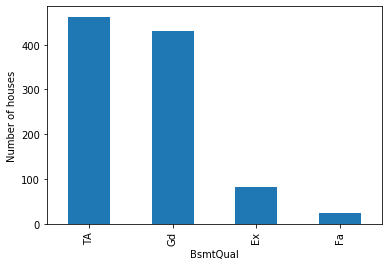

In [28]:
# let's inspect the number of observations per category in BsmtQual

# we used this line of code in section 3 on variable characteristics

# value_counts() counts the amount of houses that show each of the labels
# in the variable indicated below

x_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [29]:
# Let's find the most frequent category for BsmtQual

x_train['BsmtQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'BsmtQual')

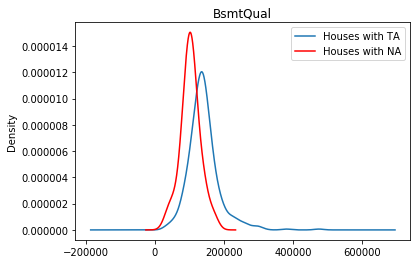

In [30]:
# let's plot the distribution of the target for the houses that:

# * show the most frequent category or
# * those that show missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# select and plot houses with the most frequent label
x_train[x_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

# select and plot houses with missing data in the variable
x_train[x_train['BsmtQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

# add figure title
plt.title('BsmtQual')

In [31]:
# I keep the original distribution of SalePrice for the most
# frequent category for later

# the use of tmp is common to name temporal variables

tmp = x_train[x_train['BsmtQual']=='TA']['SalePrice']

In [32]:
# Let's fill na in both train and test
x_train['BsmtQual'] = x_train['BsmtQual'].fillna('TA')
x_test['BsmtQual'] = x_test['BsmtQual'].fillna('TA')

In [33]:
x_train['BsmtQual'].isnull().sum()

0

Text(0, 0.5, 'Number of houses')

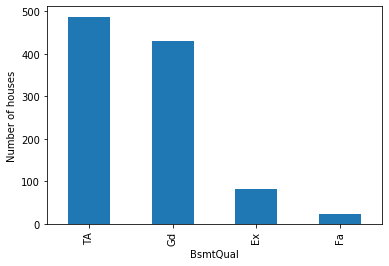

In [34]:
# evaluate effect on distribution of categories

x_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

Text(0.5, 1.0, 'BsmtQual')

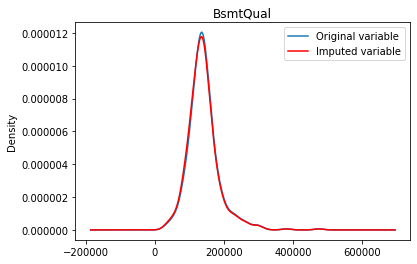

In [35]:
# did the distribution of SalePrice for the most frequent category change?
# let's have a look

fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution of salePrice for houses with most frequent label
# remember I captured this a few cells up in the notebook
tmp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
x_train[x_train['BsmtQual'] == 'TA']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('BsmtQual')

In [38]:
# FireplaceQu

# let's remind ourselves of the % of missing values
x_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

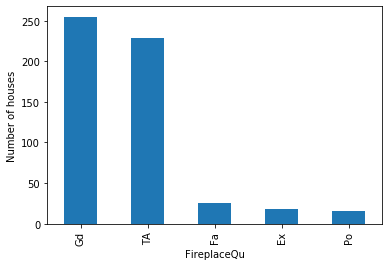

In [40]:
# let's inspect the number of observations per category

x_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

Text(0.5, 1.0, 'FirePlaceQu')

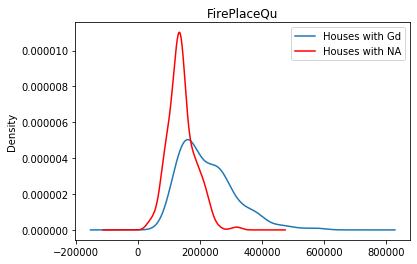

In [41]:
# let's plot the distribution of the target for the houses that
# show the most frequent category and those that show missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# houses with the most frequent label for FirePlaceQu
x_train[x_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

# houses with missing data in FirePlaceQu
x_train[x_train['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

In [42]:
# keep the original distribution of SalePrice for houses
# that show Gd in FirePlaceQu, for later.

tmp = x_train[x_train['FireplaceQu']=='Gd']['SalePrice']

In [43]:
# Let's fill na in both train and test

x_train['FireplaceQu'] = x_train['FireplaceQu'].fillna('Gd')
x_test['FireplaceQu'] = x_test['FireplaceQu'].fillna('Gd')

Text(0, 0.5, 'Number of houses')

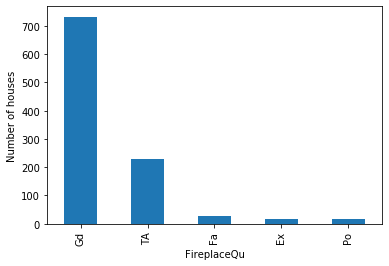

In [44]:
# let's inspect the number of observations per category

x_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

Text(0.5, 1.0, 'FirePlaceQu')

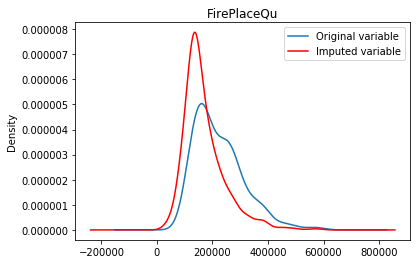

In [45]:
# let's plot the distribution of the target for the original variable
# fand the imputed variable

fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution of the variable
# remember I captured this a few cells up in the notebook
tmp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
x_train[x_train['FireplaceQu'] == 'Gd']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

#### Missing Category Imputation


When replacing NA in categorical variables by a label called 'Missing', we are not learning anything from the training set, so in principle we could do this in the original dataset and then separate into train and test. However, I do not recommend this practice. You will see in later notebooks that splitting into train and test right at the beginning helps with building a machine learning pipeline. So I will continue with this practice here as well.

In [52]:
# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('data/housing.csv', usecols=cols_to_use)
data.head()

# let's separate into training and testing set

x_train, x_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0)

x_train.shape, x_test.shape

((1022, 3), (438, 3))

0.023483365949119372


Text(0, 0.5, 'Number of houses')

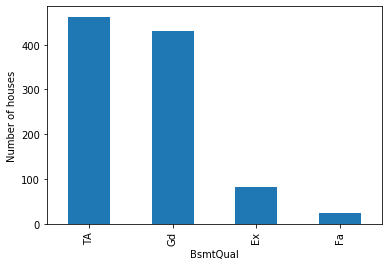

In [53]:
# BsmtQual

# let's remind ourselves of the % of missing values
print(x_train['BsmtQual'].isnull().mean())

x_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')


In [54]:
x_train['BsmtQual'] = x_train['BsmtQual'].fillna('Missing')
x_test['BsmtQual'] = x_test['BsmtQual'].fillna('Missing')

Text(0, 0.5, 'Number of houses')

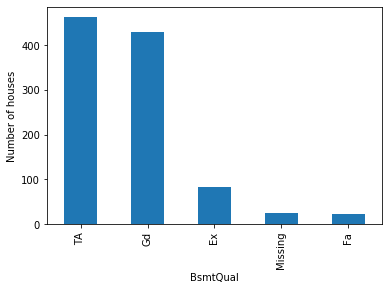

In [55]:
x_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

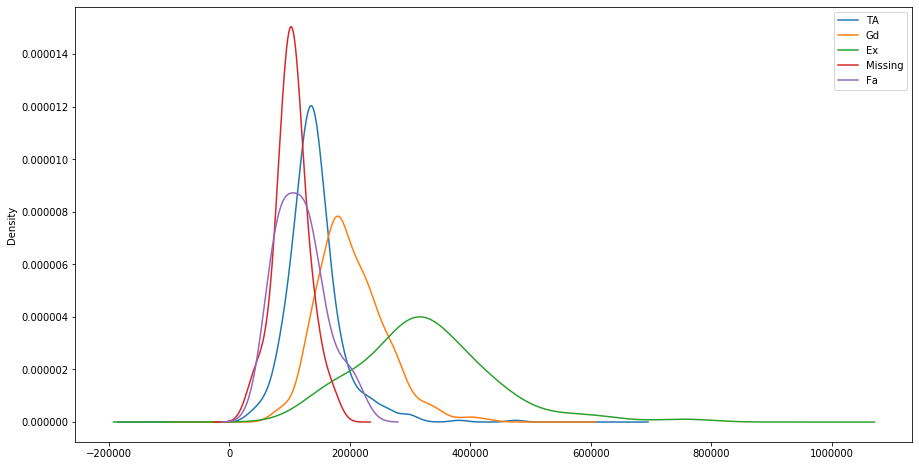

In [60]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

# a plot per category
x_train[x_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

0.46771037181996084


Text(0, 0.5, 'Number of houses')

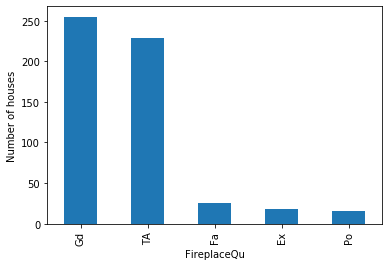

In [62]:
# FireplaceQu

# let's remind ourselves of the % of missing values
print(x_train['FireplaceQu'].isnull().mean())

x_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Number of houses')

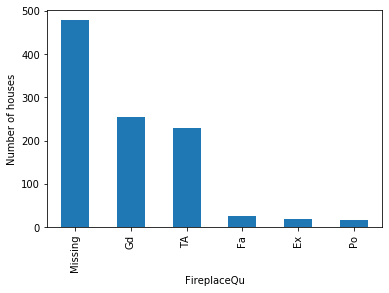

In [63]:
# Let's fill na in both train and test
x_train['FireplaceQu'] = x_train['FireplaceQu'].fillna('Missing')
x_test['FireplaceQu'] = x_test['FireplaceQu'].fillna('Missing')

# let's inspect the number of observations per category
# in the imputed variable

x_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

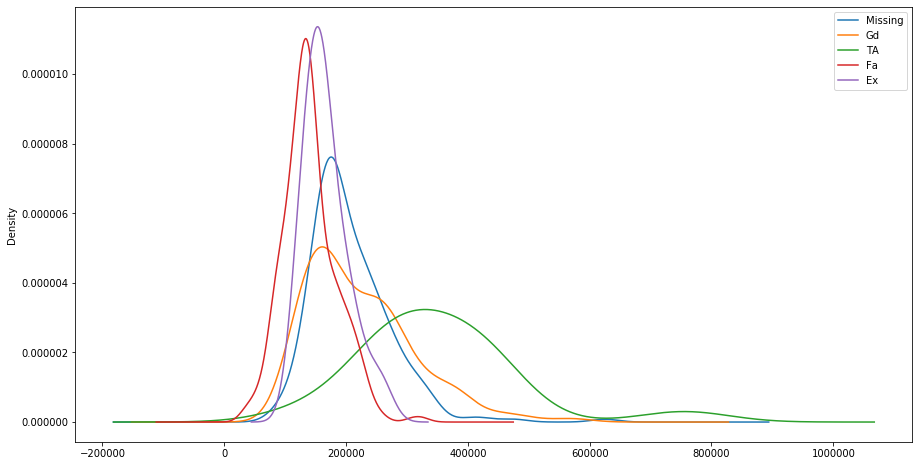

In [64]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

# a plot per category
x_train[x_train['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['FireplaceQu']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['FireplaceQu']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Missing','Gd', 'TA', 'Fa', 'Ex', 'Po']
ax.legend(lines, labels, loc='best')

In [65]:
### Generic KDE Plot for feature/target
# Works only on Categorical features

def kde_plot(df, feature, target):
    
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111)
    # loop through the cardinality
    for category in df[feature].unique():
        df[df[feature]==category][target].plot(kind='kde', ax=ax)
    
    # legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[feature].unique()
    ax.legend(lines, labels, loc='best')
    plt.show()
        

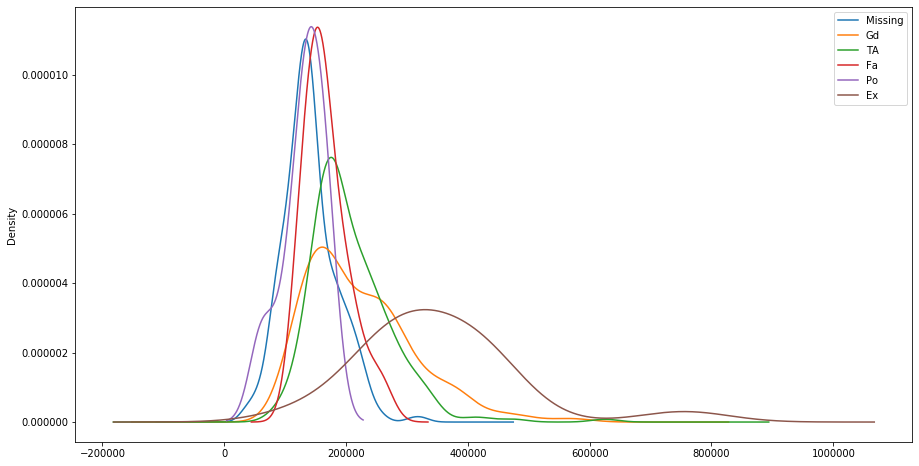

In [66]:
kde_plot(x_train, 'FireplaceQu', 'SalePrice')

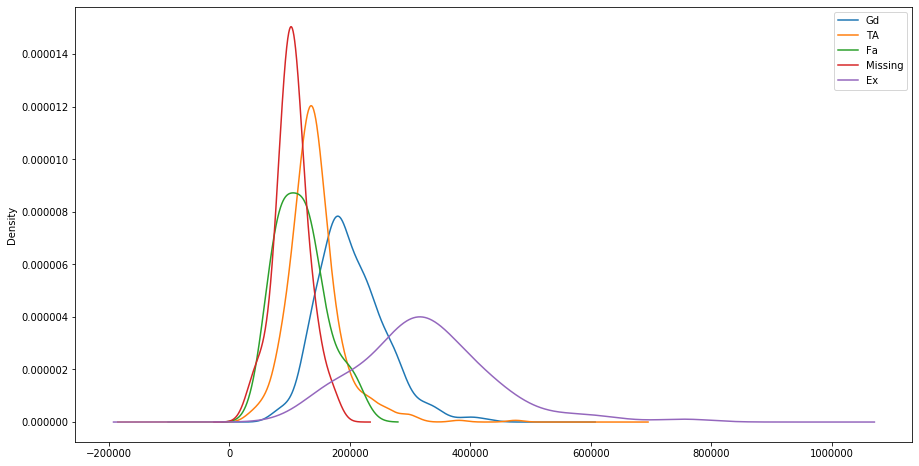

In [67]:
kde_plot(x_train, 'BsmtQual', 'SalePrice')

#### Random Sample Imputation

- Assumption: Data is missing completely at random (MCAR)
- No more than 5% of the variable contains missing data
- Well suited for linear models as it does not distort the distribution, regardless of the % of NA

In [2]:
data = pd.read_csv('data/titanic.csv', usecols=['age', 'fare', 'survived'])
print(data.isnull().mean())

# let's separate into training and testing set

x_train, x_test, y_train, y_test = train_test_split(
    data,
    data.survived,
    test_size=0.3,
    random_state=0
)
print(x_train.shape, x_test.shape)

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64
(623, 3) (268, 3)


In [3]:
# let's impute Age by random sampling both in
# train and test sets

# create the new variable where NA will be imputed:
# make a copy from the original variable, with NA
x_train["age_imputed"] = x_train["age"].copy()
x_test["age_imputed"] = x_test["age"].copy()


# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test
random_sample_train = x_train["age"].dropna().sample(
    n=x_train["age"].isnull().sum(), random_state=0
)
random_sample_test = x_test["age"].dropna().sample(
    n=x_test["age"].isnull().sum(), random_state=0
)

In [6]:
# pandas needs to have the same index in order to merge datasets
random_sample_train.index = x_train[x_train['age'].isnull()].index
random_sample_test.index = x_test[x_test['age'].isnull()].index

In [7]:
# replace the NA in the newly created variable
x_train.loc[x_train['age'].isnull(), 'age_imputed'] = random_sample_train
x_test.loc[x_test['age'].isnull(), 'age_imputed'] = random_sample_test

In [8]:
print(x_train["age_imputed"].isnull().sum(), x_test["age_imputed"].isnull().sum())

0 0


In [9]:
x_train.head()

,survived,age,fare,age_imputed
857,1,51.0,26.5500,51.0
52,1,49.0,76.7292,49.0
386,0,1.0,46.9000,1.0
124,0,54.0,77.2875,54.0
578,0,NaN,14.4583,16.0


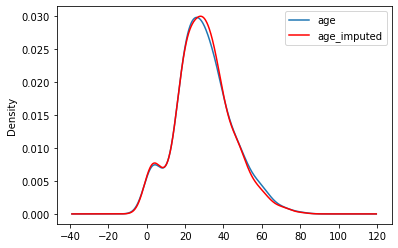

In [10]:
# we can see that the distribution of the variable after
# random sample imputation is almost exactly the same as the original

fig = plt.figure()
ax = fig.add_subplot(111)

x_train['age'].plot(kind='kde', ax=ax)
x_train['age_imputed'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [11]:
# there is some change in the variance of the variable.
# however this change is much smaller compared to mean / median
# imputation (check the previous notebook for comparison)

print('Original variable variance: ', x_train['age'].var())
print('Variance after random imputation: ', x_train['age_imputed'].var())

Original variable variance:  210.4528692463678
Variance after random imputation:  201.59945157649173


In [12]:
# the covariance of Age with Fare is also less affected by this
# imputation technique compared to mean / median imputation

x_train[['fare', 'age', 'age_imputed']].cov()

,fare,age,age_imputed
fare,2328.801583,78.468894,83.260641
age,78.468894,210.452869,210.452869
age_imputed,83.260641,210.452869,201.599452


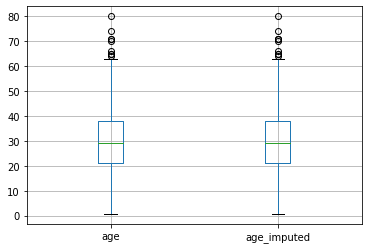

In [13]:
# Finally, the outliers are also less affected by this imputation
# technique

# Let's find out using a boxplot
x_train[['age', 'age_imputed']].boxplot()

#### Random Sample Imputation - Side Effects

In [25]:
# let's pick one observation with NA in Age
# in this case we pick observation indexed 5

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
5,0,NaN,8.4583


In [26]:
# IMPUTATION - 1

# and now let's fill that NA with a random value
# extracted from the same variable where observations are available

# extract a random value, just 1
sampled_value = x_train["age"].dropna().sample(n=1)

# re-assign the index
sampled_value.index = observation.index

observation["age_random"] = sampled_value
observation

,survived,age,fare,age_random
5,0,NaN,8.4583,9.0


In [27]:
# IMPUTATION - 2


# let us repeat the same step with another row
# extract a random value, just 1
sampled_value = x_train["age"].dropna().sample(n=1)

# re-assign the index
sampled_value.index = observation.index

observation["age_random"] = sampled_value
observation

,survived,age,fare,age_random
5,0,NaN,8.4583,30.0


In [28]:
# IMPUTATION - 3

# let us repeat the same step for third time
# extract a random value, just 1
sampled_value = x_train["age"].dropna().sample(n=1)

# re-assign the index
sampled_value.index = observation.index

observation["age_random"] = sampled_value
observation

,survived,age,fare,age_random
5,0,NaN,8.4583,24.0


We can see that every time we repeat the operation, we get a different value replacement for exactly the same observation. In fact, if we repeat the process 1000 times:

Text(0, 0.5, 'Number of times')

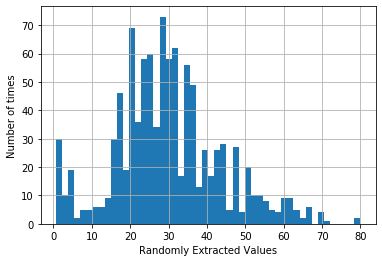

In [31]:
# if we repeat the process 1000 times:

values_ls = []

# capture the non-Na values to speed
# the computation
tmp = x_train.age.dropna()

for i in range(1000):
    
    # extract a random value, just 1
    sampled_value = tmp.sample(1).values
    
    # add the extracted value to the list
    values_ls.append(float(sampled_value))
    
pd.Series(values_ls).hist(bins=50)
plt.xlabel('Randomly Extracted Values')
plt.ylabel('Number of times')

We obtain very different values for the same observation. Note how the distribution of extracted values is similar to the distribution of Age.

If this were patients looking for treatment, every time we run a predictive model, which would operate on the differently randomly extracted values, we would assign patients with the same characteristics to different treatments, and this is not OK.

### How can we fix this behaviour?

We can fix this randomness by assigning a seed:

In [32]:
# mitigate the above behaviour by seeting a SEED

values_ls = []

for i in range(100):

    # extract a random value, just 1, now with seed
    sampled_value = x_train.age.dropna().sample(1, random_state=10)

    # add random value to the list
    values_ls.append(float(sampled_value))

# print the values
pd.Series(values_ls).unique()

array([2.])

Now that we set the seed, every randomly extracted value for that observation is the same.

However, if we set the same seed for every single observation, what would happen is that for every different observation, we would be filling the NA with exactly the same value (same seed == same random value extracted). This would be the equivalent to arbitrary value imputation!!!

We don't want that behaviour either.

Therefore, we want our seed to change observation per observation, but in a controlled manner, so that 2 observations that are exactly the same, receive the same imputed random values. But 2 observations that are different, receive different imputed random values.

#### Controlling the element of randomness by varying the seed

We can attribute a different seed to each observation, and in fact, we can make this seed depend on an alternative variable of the same observation, thus, thinking in the Titanic dataset, if 2 passengers paid exactly the same Fare, they would get exactly the same probability of survival (when Age is missing).

In [33]:

# let's pick an obersvation
observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
5,0,NaN,8.4583


In [34]:
# the seed is now the Fare
int(observation.fare)

8

In [35]:
# we assign the Fare as the seed in the random sample extraction
sampled_value = x_train.age.dropna().sample(1, random_state=int(observation.fare))
sampled_value.index = observation.index

observation['age_random'] = sampled_value
observation

,survived,age,fare,age_random
5,0,NaN,8.4583,25.0
